<a href="https://colab.research.google.com/github/signofcommunication/Statistic-Probality/blob/main/Statistika_%26_Probalitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from itertools import permutations, combinations
from math import factorial
from scipy.stats import binom, poisson

a. Statistik Dasar:
   Mean: 78.90
   Median: 80.00
  Modus : 60, 65, 70, 74, 78, 82, 85, 88, 92, 95 (multimode)

b. Ukuran Penyebaran:
   Range: 35
   Variance: 134.99
   Standard Deviation: 11.62

c. & d. Tabel Distribusi Frekuensi:
    Range  Frequency  Relative Frequency  Percentage
 [60, 65)          1                 0.1        10.0
 [65, 70)          1                 0.1        10.0
 [70, 75)          2                 0.2        20.0
 [75, 80)          1                 0.1        10.0
 [80, 85)          1                 0.1        10.0
 [85, 90)          2                 0.2        20.0
 [90, 95)          1                 0.1        10.0
[95, 100)          1                 0.1        10.0

e. Histogram Distribusi Persentase:


<ipython-input-4-be14d3eac744>:38: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  freq_table = pd.value_counts(freq_dist, sort=False).reset_index()


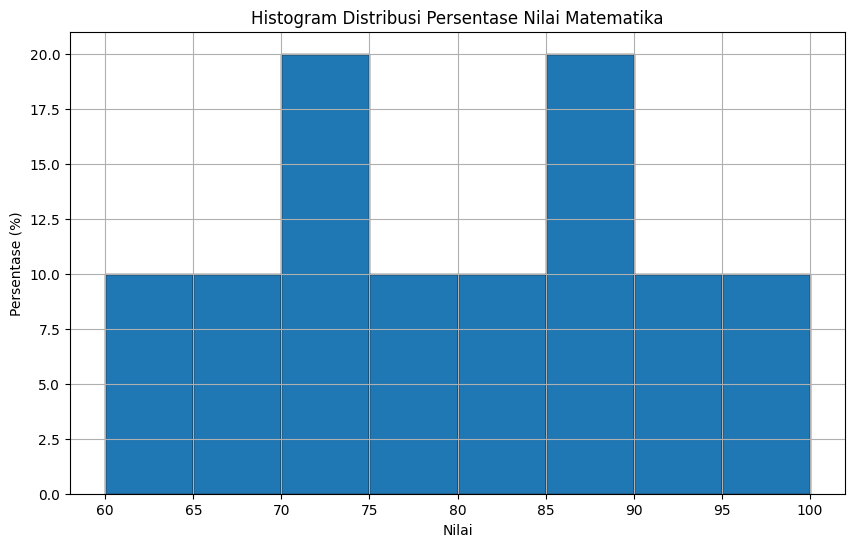


f. Dot Plot:


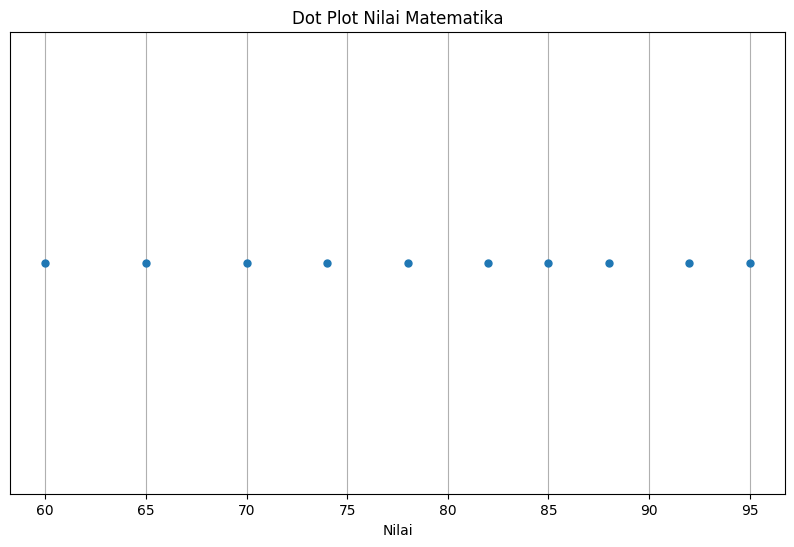


g. Box Plot:


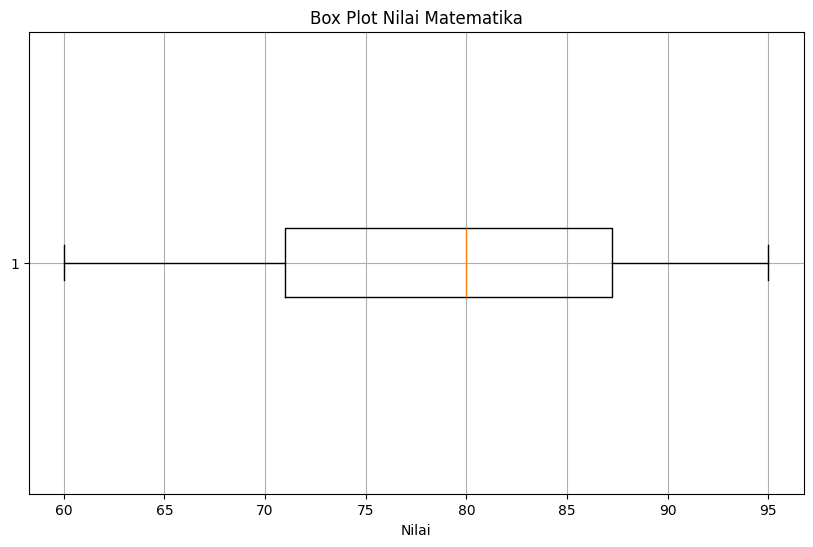


h. Analisis Skewness:
   Skewness: -0.21
   Distribusi bersifat negatively skewed (condong ke kiri).
   Skewness mengukur tingkat asimetri distribusi data. Nilai mendekati 0 menunjukkan distribusi yang simetris.


In [4]:
# Membaca data dari file CSV
df = pd.read_csv('/content/Data Nilai Siswa 2.csv')

# Mengambil kolom Nilai_Matematika untuk analisis
data = df['Nilai_Matematika'].values[:10]

# a. Menghitung mean, median, dan mode
mean = np.mean(data)
median = np.median(data)
mode_result = stats.mode(data)

# Mode
values, counts = np.unique(data, return_counts=True)
max_count = np.max(counts)
modes = values[counts == max_count]

print("a. Statistik Dasar:")
print(f"   Mean: {mean:.2f}")
print(f"   Median: {median:.2f}")
if len(modes) > 1:
    print(f"  Modus : {', '.join(map(str,modes))} (multimode)")
else:
    print(f"  Modus: {modes[0]}")

# b. Menghitung range, variance, dan standard deviation
data_range = np.max(data) - np.min(data)
variance = np.var(data, ddof=1)
std_dev = np.std(data, ddof=1)

print("\nb. Ukuran Penyebaran:")
print(f"   Range: {data_range}")
print(f"   Variance: {variance:.2f}")
print(f"   Standard Deviation: {std_dev:.2f}")

# c. Membuat tabel frequency distribution
bins = np.arange(60, 101, 5)  # Kelas: 60-65, 65-70, ..., 95-100
freq_dist = pd.cut(data, bins=bins, include_lowest=True, right=False)
freq_table = pd.value_counts(freq_dist, sort=False).reset_index()
freq_table.columns = ['Range', 'Frequency']

# d. Menghitung relative frequency dan persentase
total = len(data)
freq_table['Relative Frequency'] = freq_table['Frequency'] / total
freq_table['Percentage'] = freq_table['Relative Frequency'] * 100

print("\nc. & d. Tabel Distribusi Frekuensi:")
print(freq_table.to_string(index=False))

# e. Membuat histogram dari distribusi persentase
print("\ne. Histogram Distribusi Persentase:")
plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, weights=np.ones_like(data) / total * 100, edgecolor='black')
plt.title('Histogram Distribusi Persentase Nilai Matematika')
plt.xlabel('Nilai')
plt.ylabel('Persentase (%)')
plt.grid(True)
plt.show()

# f. Membuat dot plot
print("\nf. Dot Plot:")
plt.figure(figsize=(10, 6))
plt.plot(data, np.zeros_like(data), 'o', markersize=5)
plt.title('Dot Plot Nilai Matematika')
plt.xlabel('Nilai')
plt.yticks([])
plt.grid(True)
plt.show()

# g. Membuat box plot
print("\ng. Box Plot:")
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)
plt.title('Box Plot Nilai Matematika')
plt.xlabel('Nilai')
plt.grid(True)
plt.show()

# h. Menghitung dan menjelaskan skewness
skewness = stats.skew(data)

print("\nh. Analisis Skewness:")
print(f"   Skewness: {skewness:.2f}")
if skewness > 0:
    print("   Distribusi bersifat positively skewed (condong ke kanan).")
elif skewness < 0:
    print("   Distribusi bersifat negatively skewed (condong ke kiri).")
else:
    print("   Distribusi simetris.")
print("   Skewness mengukur tingkat asimetri distribusi data. Nilai mendekati 0 menunjukkan distribusi yang simetris.")

# Probabilitas

In [ ]:
# Fungsi untuk menghitung permutasi (nPr)
def perm(n, r):
    return factorial(n) // factorial(n - r)

# Fungsi untuk menghitung kombinasi (nCr)
def comb(n, r):
    return factorial(n) // (factorial(r) * factorial(n - r))

# a. Input data dari pengguna
print("Masukkan data sebagai angka-angka yang dipisahkan oleh spasi (contoh: 1 2 3 4 5):")
try:
    data_input = input("Data: ")
    data = [int(x) for x in data_input.split()]  # Mengubah input menjadi list integer
    data_set = set(data)  # Mengubah ke set untuk operasi himpunan
    total_data = len(data)
except ValueError:
    print("Error: Masukkan angka yang valid!")
    exit()

print("\nData yang dimasukkan:", data)
print("Total elemen:", total_data)

# b. Menentukan probabilitas kejadian tertentu
print("\nb. Probabilitas Kejadian:")
try:
    event_input = input("Masukkan nilai kejadian yang ingin dihitung probabilitasnya (pisahkan dengan spasi, contoh: 2 4): ")
    event = [int(x) for x in event_input.split()]  # Kejadian yang dicari
    event_count = sum(1 for x in data if x in event)  # Menghitung frekuensi kejadian
    probability = event_count / total_data if total_data > 0 else 0
    print(f"Frekuensi kejadian {event}: {event_count}")
    print(f"Probabilitas kejadian {event}: {probability:.2f} ({event_count}/{total_data})")
except ValueError:
    print("Error: Masukkan angka yang valid untuk kejadian!")
    exit()

# c. Menentukan permutasi dan kombinasi
print("\nc. Permutasi dan Kombinasi:")
n = len(data_set)  # Jumlah elemen unik
try:
    r = int(input(f"Masukkan jumlah elemen yang akan dipilih (r) dari {n} elemen: "))
    if r <= n:
        perm_result = perm(n, r)
        comb_result = comb(n, r)
        print(f"Permutasi ({n}P{r}): {perm_result}")
        print(f"Kombinasi ({n}C{r}): {comb_result}")
    else:
        print(f"Nilai r ({r}) tidak boleh lebih besar dari n ({n}).")
except ValueError:
    print("Error: Masukkan angka yang valid untuk r!")
    exit()

# d. Menentukan union, intersection, dan complement
print("\nd. Operasi Himpunan:")
print("Masukkan dua himpunan untuk operasi union, intersection, dan complement.")
try:
    set1_input = input("Himpunan 1 (pisahkan dengan spasi, contoh: 1 2 3): ")
    set2_input = input("Himpunan 2 (pisahkan dengan spasi, contoh: 4 5 6): ")
    set1 = set(int(x) for x in set1_input.split())
    set2 = set(int(x) for x in set2_input.split())
    universal_set = data_set  # Menggunakan data awal sebagai himpunan universal

    union = set1.union(set2)
    intersection = set1.intersection(set2)
    complement_set1 = universal_set - set1  # Complement dari set1 terhadap universal set
    complement_set2 = universal_set - set2  # Complement dari set2 terhadap universal set

    print(f"Himpunan Universal (berdasarkan data): {universal_set}")
    print(f"Himpunan 1: {set1}")
    print(f"Himpunan 2: {set2}")
    print(f"Union (Set1 ∪ Set2): {union}")
    print(f"Intersection (Set1 ∩ Set2): {intersection}")
    print(f"Complement Set1: {complement_set1}")
    print(f"Complement Set2: {complement_set2}")
except ValueError:
    print("Error: Masukkan angka yang valid untuk himpunan!")
    exit()

Masukkan data sebagai angka-angka yang dipisahkan oleh spasi (contoh: 1 2 3 4 5):
Data: 1 2 3 4 5

Data yang dimasukkan: [1, 2, 3, 4, 5]
Total elemen: 5

b. Probabilitas Kejadian:
Masukkan nilai kejadian yang ingin dihitung probabilitasnya (pisahkan dengan spasi, contoh: 2 4): 2 4
Frekuensi kejadian [2, 4]: 2
Probabilitas kejadian [2, 4]: 0.40 (2/5)

c. Permutasi dan Kombinasi:
Masukkan jumlah elemen yang akan dipilih (r) dari 5 elemen: 5
Permutasi (5P5): 120
Kombinasi (5C5): 1

d. Operasi Himpunan:
Masukkan dua himpunan untuk operasi union, intersection, dan complement.
Himpunan 1 (pisahkan dengan spasi, contoh: 1 2 3): 1 2 3
Himpunan 2 (pisahkan dengan spasi, contoh: 4 5 6): 3 4 5
Himpunan Universal (berdasarkan data): {1, 2, 3, 4, 5}
Himpunan 1: {1, 2, 3}
Himpunan 2: {3, 4, 5}
Union (Set1 ∪ Set2): {1, 2, 3, 4, 5}
Intersection (Set1 ∩ Set2): {3}
Complement Set1: {4, 5}
Complement Set2: {1, 2}


# Distribution

=== Distribusi Binomial ===
Masukkan parameter untuk distribusi Binomial:
Jumlah percobaan (n): 5
Probabilitas sukses (p, antara 0 dan 1): 0.5

Probabilitas Massa (PMF) Binomial:
P(X = 0) = 0.0312
P(X = 1) = 0.1562
P(X = 2) = 0.3125
P(X = 3) = 0.3125
P(X = 4) = 0.1562
P(X = 5) = 0.0312

Total Probabilitas: 1.0000 (harus mendekati 1)


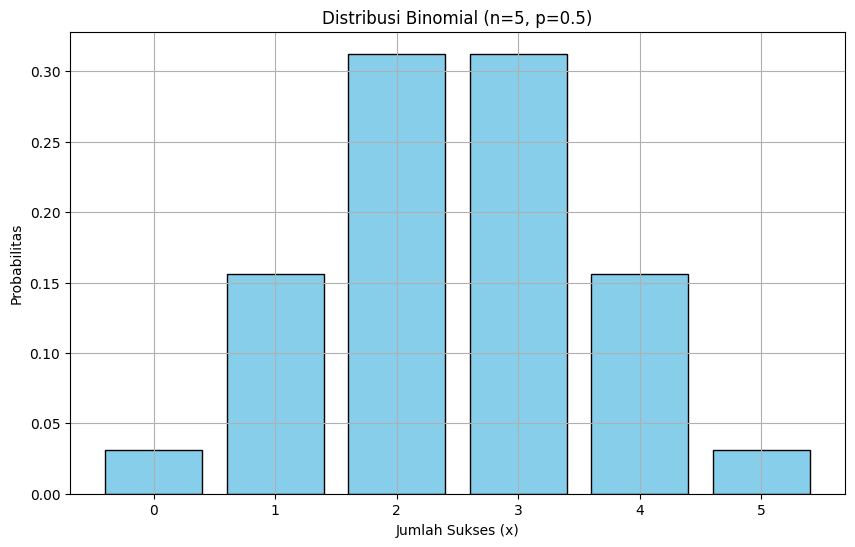


=== Distribusi Poisson ===
Masukkan parameter untuk distribusi Poisson:
Rata-rata kejadian (λ): 3

Probabilitas Massa (PMF) Poisson:
P(X = 0) = 0.0498
P(X = 1) = 0.1494
P(X = 2) = 0.2240
P(X = 3) = 0.2240
P(X = 4) = 0.1680
P(X = 5) = 0.1008
P(X = 6) = 0.0504
P(X = 7) = 0.0216
P(X = 8) = 0.0081
P(X = 9) = 0.0027

Total Probabilitas: 0.9989 (harus mendekati 1)
(Catatan: Total mungkin kurang dari 1 karena rentang x terbatas)


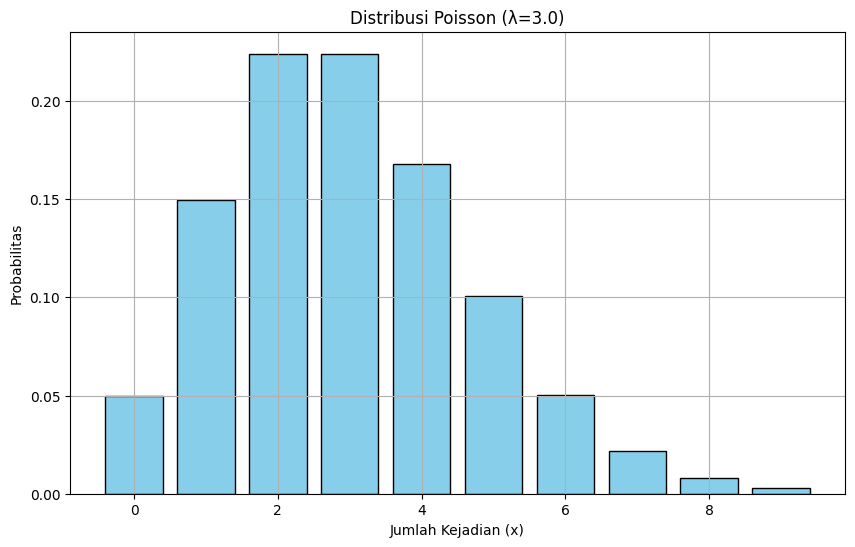

In [ ]:
def plot_distribution(x, pmf, title, xlabel):
    plt.figure(figsize=(10, 6))
    plt.bar(x, pmf, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Probabilitas')
    plt.grid(True)
    plt.show()

# Distribusi Binomial
print("=== Distribusi Binomial ===")
print("Masukkan parameter untuk distribusi Binomial:")
try:
    n = int(input("Jumlah percobaan (n): "))  # Jumlah percobaan
    p = float(input("Probabilitas sukses (p, antara 0 dan 1): "))  # Probabilitas sukses
    if not (0 <= p <= 1):
        raise ValueError("Probabilitas p harus antara 0 dan 1!")
    if n < 0:
        raise ValueError("Jumlah percobaan n harus non-negatif!")

    # Rentang nilai x (0 sampai n)
    x_binom = np.arange(0, n + 1)
    # Probabilitas massa (PMF) untuk setiap x
    binom_pmf = binom.pmf(x_binom, n, p)

    # Output hasil
    print("\nProbabilitas Massa (PMF) Binomial:")
    for x, prob in zip(x_binom, binom_pmf):
        print(f"P(X = {x}) = {prob:.4f}")

    # Verifikasi total probabilitas
    total_prob_binom = sum(binom_pmf)
    print(f"\nTotal Probabilitas: {total_prob_binom:.4f} (harus mendekati 1)")

    # Plot distribusi binomial
    plot_distribution(x_binom, binom_pmf, f'Distribusi Binomial (n={n}, p={p})', 'Jumlah Sukses (x)')

except ValueError as e:
    print(f"Error: {e}")
    exit()

# Distribusi Poisson
print("\n=== Distribusi Poisson ===")
print("Masukkan parameter untuk distribusi Poisson:")
try:
    lambda_poisson = float(input("Rata-rata kejadian (λ): "))  # Rata-rata kejadian per interval
    if lambda_poisson < 0:
        raise ValueError("Lambda (λ) harus non-negatif!")

    # Rentang nilai x (0 sampai batas praktis, misalnya 3λ atau lebih)
    x_poisson = np.arange(0, int(lambda_poisson * 3) + 1)
    # Probabilitas massa (PMF) untuk setiap x
    poisson_pmf = poisson.pmf(x_poisson, lambda_poisson)

    # Output hasil
    print("\nProbabilitas Massa (PMF) Poisson:")
    for x, prob in zip(x_poisson, poisson_pmf):
        print(f"P(X = {x}) = {prob:.4f}")

    # Verifikasi total probabilitas
    total_prob_poisson = sum(poisson_pmf)
    print(f"\nTotal Probabilitas: {total_prob_poisson:.4f} (harus mendekati 1)")
    print("(Catatan: Total mungkin kurang dari 1 karena rentang x terbatas)")

    # Plot distribusi Poisson
    plot_distribution(x_poisson, poisson_pmf, f'Distribusi Poisson (λ={lambda_poisson})', 'Jumlah Kejadian (x)')

except ValueError as e:
    print(f"Error: {e}")
    exit()